# Unzipping dataset

In [1]:
!unzip "/content/titanic.zip" -d "/content"

Archive:  /content/titanic.zip
  inflating: /content/gender_submission.csv  
  inflating: /content/test.csv       
  inflating: /content/train.csv      


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import warnings
import re
warnings.filterwarnings('ignore')
%matplotlib inline

# Importind Dataset

In [3]:
df = pd.read_csv('train.csv')

In [241]:
test = pd.read_csv('test.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On a first glance, the following features would not be of much help to us.

*   PassengerId
*   Name
*   Ticket
*   Fare





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Let us check for missing values.

In [8]:
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Cabin feature has 77% of it's values missing. We will most probably drop this feature. Age and Embarked however, can be dealt with either mean, mode or median method.

# Exploratory Data Analysis

## Univariate Analysis

### Survived(Target Variable)

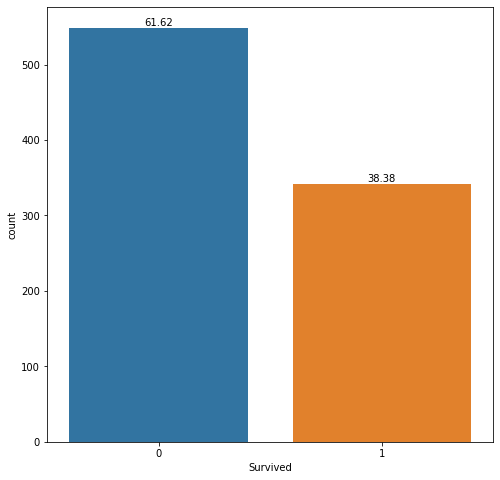

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot('Survived', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 


*   Our dataset is slighlty imbalanced with **61.6%** of people dying and **38.4%** of people surviving.




### Pclass

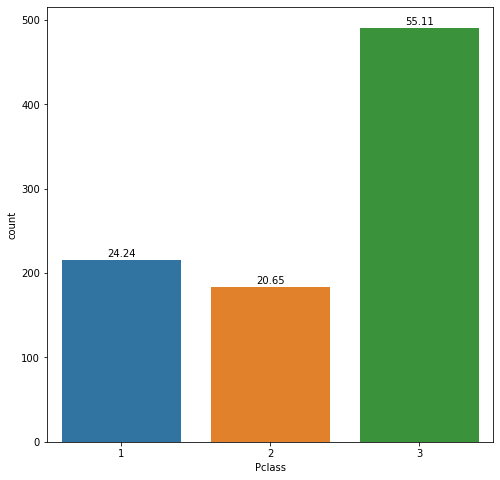

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot('Pclass', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   3rd Class tickets are the highest in this dataset with 55.11%. This intuitivle makes sense since this dataset has more people not surviving.



### Sex

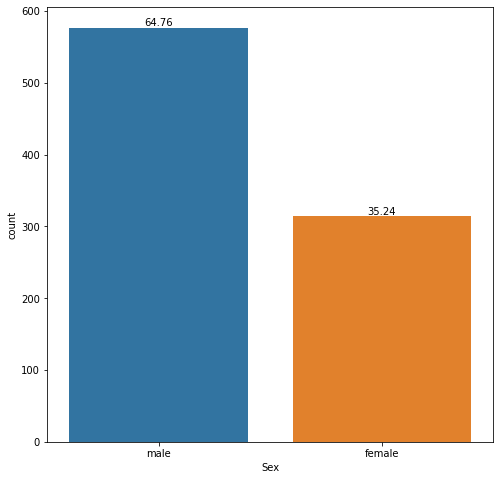

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot('Sex', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   The dataset is biased towards men with 64.8% men and 35.2% women.
*   Again, this makes sense as this dataset contains majority of the people not surviving.
*   We know priority was given to save the women and children during the accident.






### Age

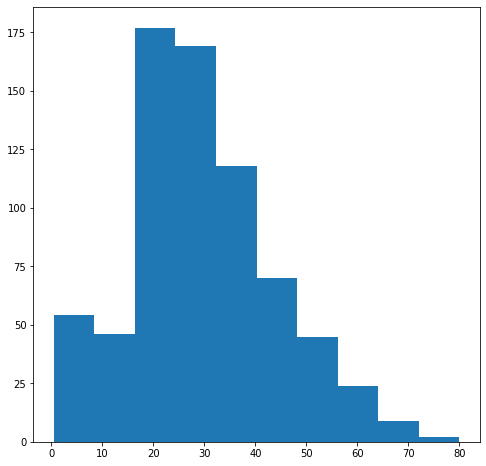

In [ ]:
df['Age'].hist(figsize=(8,8), grid=False)



*   We can see that majority of the dataset contains people below 38(75%).
*   Younger people would have had a higher chance of not surviving as preference would have been given to older people.
*   A very small amount of the dataset is of people above 70 years.






### SibSp

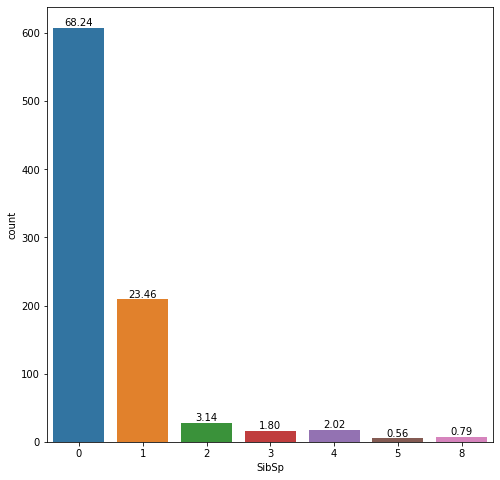

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot('SibSp', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   About 91% of the dataset had either no siblings or just one sibling.



### Parch

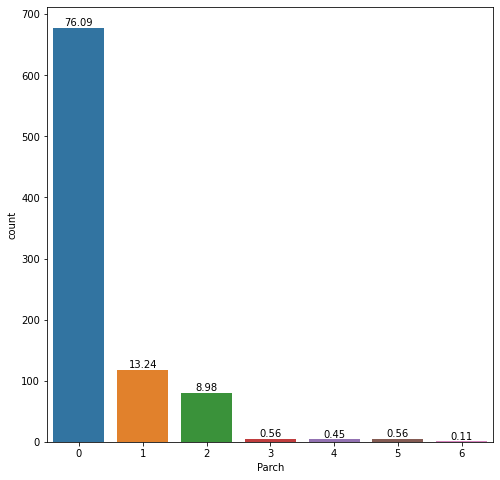

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot('Parch', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   About 76% of the people had no parents onboard Titanic.
*   About 22% of the people had one or two parents aboard the Titanic.



Maybe we can combine SbSp and Parch features to get one single feature.

### Fare

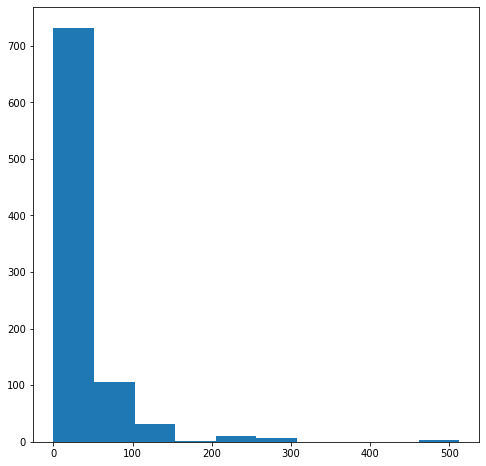

In [ ]:
df['Fare'].hist(figsize=(8,8), grid=False)



*   This feature doesn't seem as useful as we already have Pclass. They are very similar features and will probably be highly correlated.
*   75% of the people has a fare of 31 or below.



### Embarked

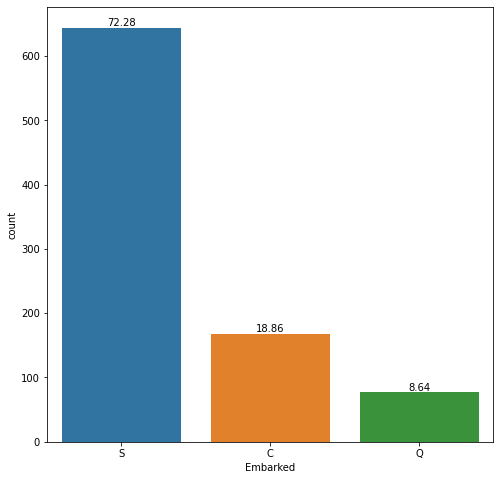

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot('Embarked', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   About 72% of people embarked the journey from Southampton. It would be interesting to figure out if this feature has an influence on Survival.



## Bivariate Analysis

### Pclass and Survived

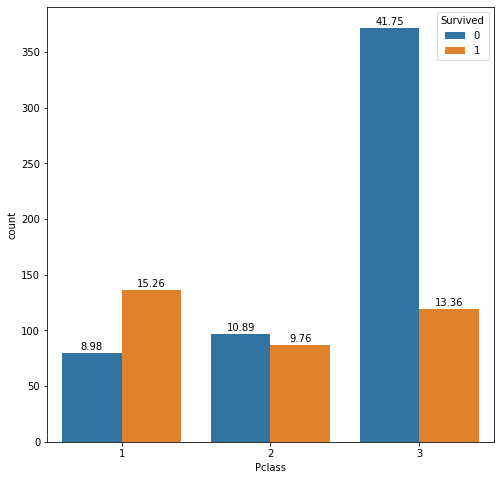

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   Richer people with 1st class tickets had a higher chance of survival than dying.
*   2nd class people almost survived or not survived at the same rate.
*   People with 3rd class tickets died disproportionately.
*   This shows us the class imbalance in Titanic, which is smaller reflection of our society.





### Sex and Survived

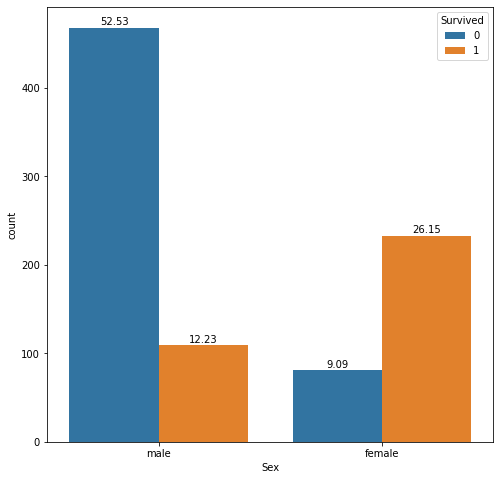

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot(x = 'Sex', hue = 'Survived', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   There was a higher chance of dying if you were a man on the Titanic.
*   Even though this dataset contains more men(65%), more women survived than men.
*   Men were asked to sacrifice their lives for women and children.






### Age and Survived

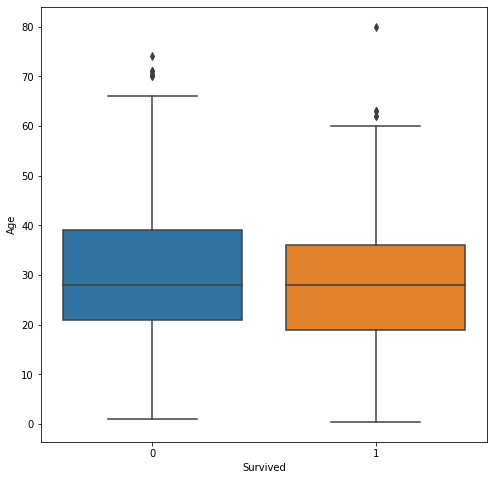

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Survived', y = 'Age', data=df)



*   The mean age of people not suriving is higher than people surviving.
*   This indicates younger people/children had a higher chance of survival.
*   We notice very low number of outliers for both 0 and 1.





### SibSp and Survived

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


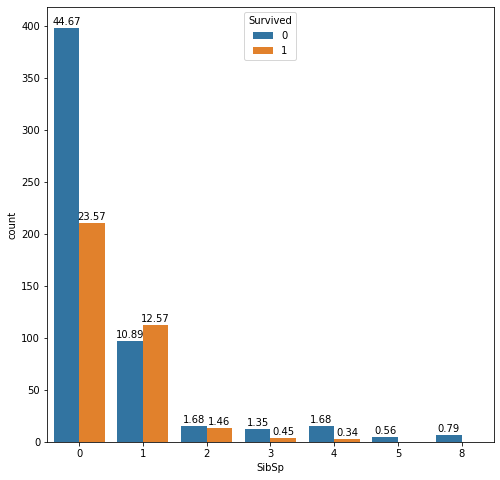

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot(x = 'SibSp', hue = 'Survived', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 



*   People with one sibling and spouse had a higher chance of surviving than not surviving.
*   If you had a lot of siblings, you had a significantly lower chance of surviving.



### Parch and Survived

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


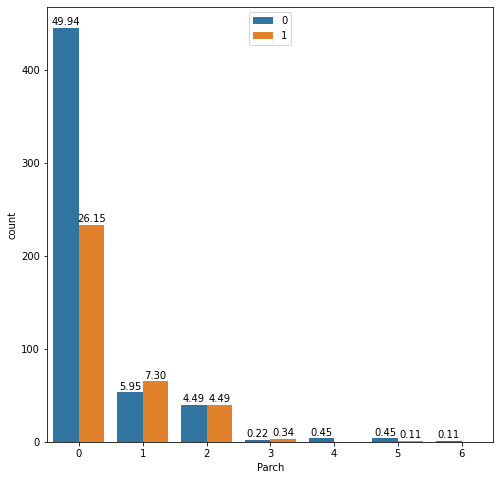

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot(x = 'Parch', hue = 'Survived', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 
plt.legend(loc='upper center')

### Fare and Survived

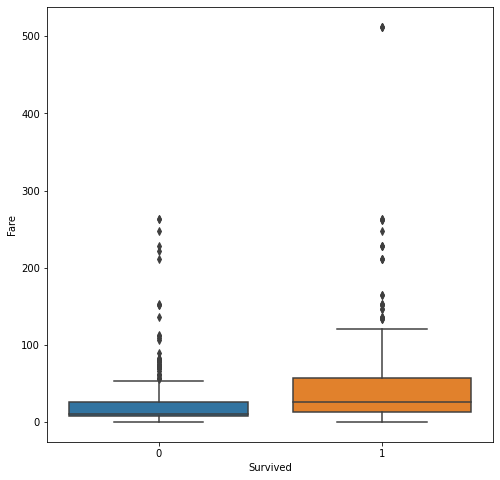

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Survived', y = 'Fare', data=df)



*   As expected, the mean Fare of people surviving is higher than the mean of people who didn't survive.
*   There are a lot of outliers for both the cases.



### Embarked and Survived

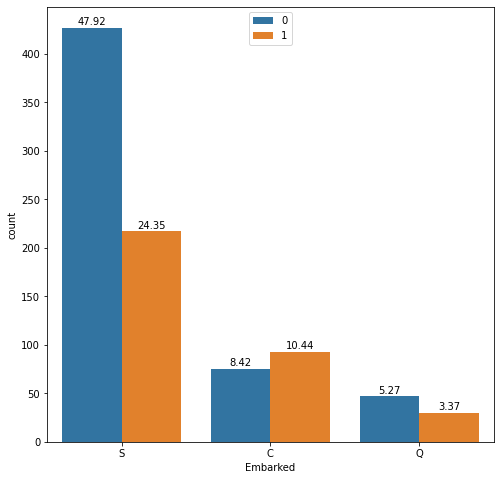

In [ ]:
plt.figure(figsize=(8,8))
total = float(len(df['Survived']))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data=df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 3.,
          '{:1.2f}'.format((height/total)*100),
          ha='center') 
plt.legend(loc='upper center')



*   People embarking from Cherbourg had a higher chance of surviving than not surviving.



## Correlation Matrix

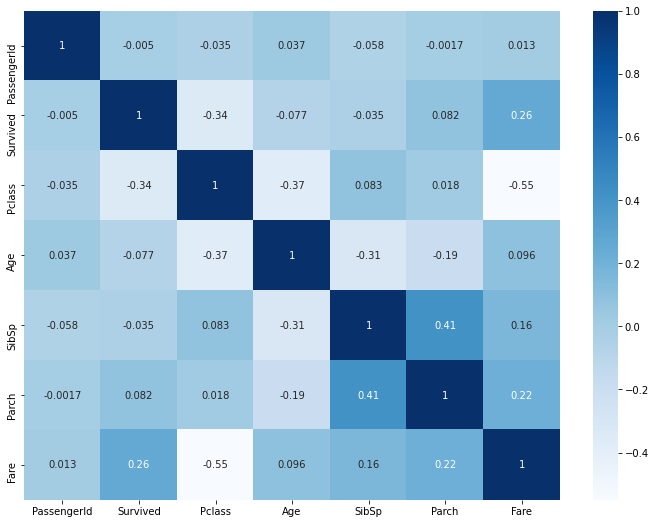

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap='Blues')



*   Fare and Pclass have a strong positive correlation with our target variable.
*   As expected, Pclass and Fare a strong negative correlation.
*   SibSp and Parch have a strong positive correlation.
*   SibSp and Age have a good negative correlation.





# Data Cleaning

In [154]:
data = df.copy()

In [155]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling missing values.

Dropping Cabin as it has 77% missing values. Dropping PassengerId and ticket as well.

In [156]:
data.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

We will fill the null values in Age by the mean of the feature.

In [157]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [158]:
data['Age'] = data['Age'].astype(int)

In [159]:
data['Fare'] = data['Fare'].astype(int)

We only have 2 missing values in Embarked. We will fill it using the Mode of the feature.

In [160]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [161]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Missing values have been handled.

## Handling Categorical Data

### Sex

In [162]:
sex_map = {'female' : 0, 'male' : 1}

In [163]:
data['Sex'] = data['Sex'].map(sex_map)

### Embarked

In [164]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [165]:
embarked_map = {'S' : 0, 'C' : 1, 'Q' : 2}

In [166]:
data['Embarked'] = data['Embarked'].map(embarked_map)

### We will now convert Age into Age ranges.

In [167]:
data['Age'] = data['Age'].astype(int)
data.loc[data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[data['Age'] > 66, 'Age'] = 6

In [168]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,5,1,0,71,1
2,1,3,"Heikkinen, Miss. Laina",0,3,0,0,7,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5,1,0,53,0
4,0,3,"Allen, Mr. William Henry",1,5,0,0,8,0


Notice we havent removed 'Name' yet. This is because I felt we could extract a feature from it. Notice that every name has a title: Mr, Mrs, Miss, etc. 

We will use regex to extract that into a new feature and drop the Name feature.

## Feature Engineering

In [169]:
def extract_title(name):
  name = re.search('\w+[.]', name).group(0)
  name = re.sub('[.]', '', name)
  return name

In [170]:
data['Title'] = data['Name'].apply(lambda x : extract_title(x))

In [171]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Don           1
Ms            1
Countess      1
Jonkheer      1
Capt          1
Lady          1
Mme           1
Name: Title, dtype: int64

In [172]:
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Cap', 'Col', 'Don', 'Dr'\
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [173]:
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [174]:
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

In [175]:
data['Title'] = data['Title'].map(titles)

In [176]:
data['Title'] = data['Title'].fillna(0)
data['Title'] = data['Title'].astype(int)

Let us drop the Name column

In [177]:
data.drop(['Name'], axis=1, inplace=True)

Let's extract a few new features from SibSp and Parch.

In [178]:
data['Relatives'] = data['SibSp'] + data['Parch']

In [179]:
data.loc[data['Relatives'] > 0, 'not_alone'] = 0
data.loc[data['Relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)

In [180]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relatives,not_alone
0,0,3,1,2,1,0,7,0,1,1,0
1,1,1,0,5,1,0,71,1,3,1,0
2,1,3,0,3,0,0,7,0,2,0,1
3,1,1,0,5,1,0,53,0,3,1,0
4,0,3,1,5,0,0,8,0,1,0,1


## Splitting Data into Training and Test set

In [181]:
y = data.iloc[:, 0].values

In [182]:
data.drop(['Survived'], axis=1, inplace=True)

In [183]:
x = data.values

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling Fare Column

In [185]:
ct = ColumnTransformer(transformers=[('scaling',  StandardScaler(), [5])], remainder='passthrough')
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.transform(x_test))

Our data is ready for our Models

# Models

### Function for Evaluating Model Performance

In [186]:
def score(y_pred,y_test):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    accuracy = accuracy_score(y_test,y_pred)*100
    auc = roc_auc_score(y_test,y_pred)*100
    print("Accuracy Score", accuracy, "%")
    print("ROC_AUC Score", auc, "%")
    return (accuracy, auc)

## Logistic Regression

In [187]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_log_pred = log_reg.predict(x_test)

Accuracy Score 82.12290502793296 %
ROC_AUC Score 81.68935815504307 %


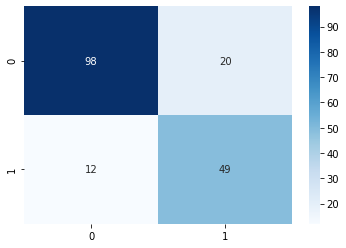

In [188]:
log_acc, log_auc = score(y_test, y_log_pred)

## KNN

In [189]:
knn_class = KNeighborsClassifier()
knn_class.fit(x_train, y_train)
y_knn_pred = knn_class.predict(x_test)

Accuracy Score 81.00558659217877 %
ROC_AUC Score 80.12820512820514 %


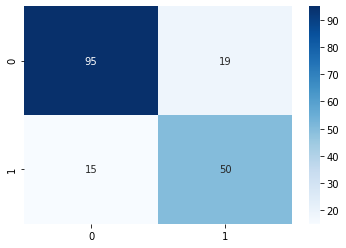

In [190]:
knn_acc, knn_auc = score(y_test, y_knn_pred)

## SVM Linear

In [191]:
svc_class = SVC(kernel='linear')
svc_class.fit(x_train,y_train)
y_svc_pred = svc_class.predict(x_test)

Accuracy Score 83.24022346368714 %
ROC_AUC Score 82.71756978653531 %


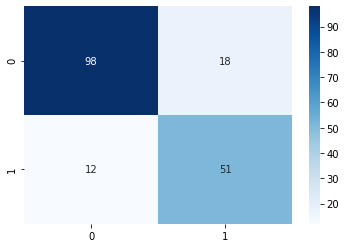

In [192]:
svc_acc, svc_auc = score(y_test, y_svc_pred)

## SVM Kernel

In [193]:
kernel_class = SVC()
kernel_class.fit(x_train,y_train)
y_kernel_pred = kernel_class.predict(x_test)

Accuracy Score 83.24022346368714 %
ROC_AUC Score 82.54385964912281 %


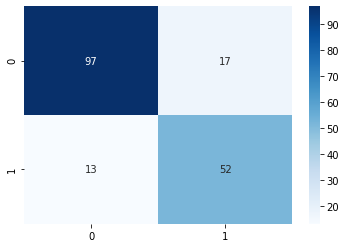

In [194]:
kernel_acc, kernel_auc = score(y_test, y_kernel_pred)

## Naive Bayes

In [195]:
nb_class = GaussianNB()
nb_class.fit(x_train,y_train)
y_nb_pred = nb_class.predict(x_test)

Accuracy Score 80.44692737430168 %
ROC_AUC Score 79.32892004153686 %


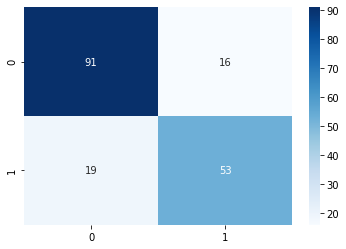

In [196]:
nb_acc, nb_auc = score(y_test, y_nb_pred)

## Decision Tree

In [197]:
dt_class = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_class.fit(x_train, y_train)
y_dt_pred = dt_class.predict(x_test)

Accuracy Score 80.44692737430168 %
ROC_AUC Score 79.3918918918919 %


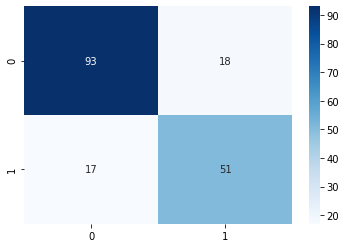

In [198]:
dt_acc, dt_auc = score(y_test, y_dt_pred)

## Random Forrest

In [199]:
rf_class = RandomForestClassifier(criterion='entropy', random_state=42)
rf_class.fit(x_train, y_train)
y_rf_pred = rf_class.predict(x_test)

Accuracy Score 81.00558659217877 %
ROC_AUC Score 80.02398720682304 %


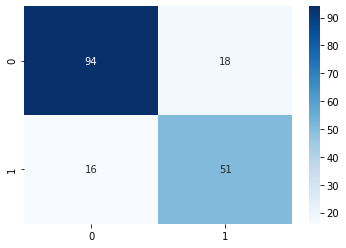

In [200]:
rf_acc, rf_auc = score(y_test, y_rf_pred)

## XGBoost

In [201]:
xgb_class = XGBClassifier(random_state=42)
xgb_class.fit(x_train,y_train)
y_xgb_pred = xgb_class.predict(x_test)

Accuracy Score 82.12290502793296 %
ROC_AUC Score 81.68935815504307 %


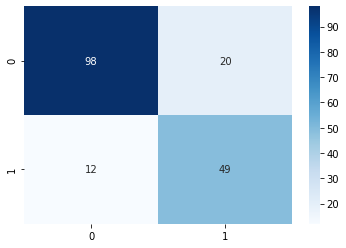

In [202]:
xgb_acc, xgb_auc = score(y_test, y_xgb_pred)

## LightGBM

In [203]:
lgb_class = LGBMClassifier(random_state=42)
lgb_class.fit(x_train,y_train)
y_lgb_pred = lgb_class.predict(x_test)

Accuracy Score 81.00558659217877 %
ROC_AUC Score 79.95388669301713 %


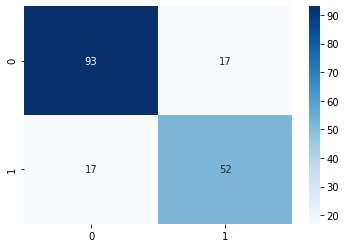

In [204]:
lgb_acc, lgb_auc = score(y_test, y_lgb_pred)

# Comparing Model Performance

In [205]:
model_accuracy = [log_acc, knn_acc, svc_acc, kernel_acc, nb_acc, dt_acc, rf_acc, xgb_acc, lgb_acc]
model_auc = [log_auc, knn_auc, svc_auc, kernel_auc, nb_auc, dt_auc, rf_auc, xgb_auc, lgb_auc]
models=["Logistic Regression", "KNN", "SVC Linear", "SVC Kernel", "Naive Bayes", "Decision Tree", "Random Forrest", "XGBoost", "LightGBM"]

Text(0.5, 1.0, 'Comparing Model Accuracy(Test Set)')

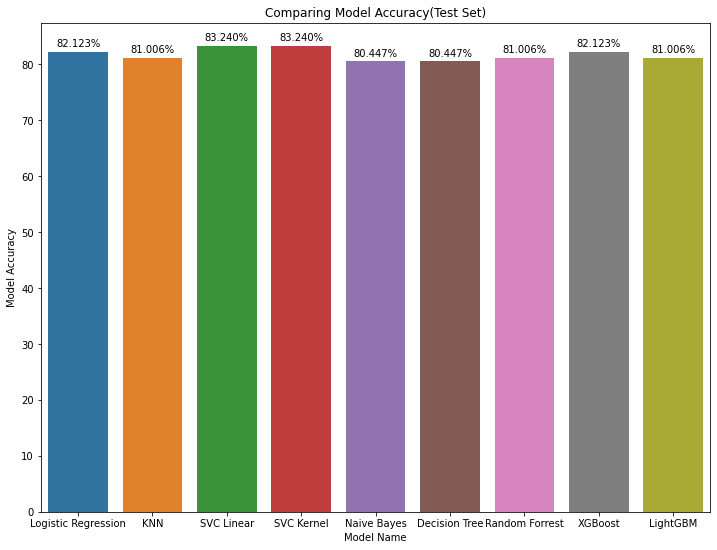

In [206]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_accuracy)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')
  
plt.ylabel('Model Accuracy')
plt.xlabel('Model Name')
plt.title('Comparing Model Accuracy(Test Set)')

Text(0.5, 1.0, 'Comparing Model AUC Score(Test Set)')

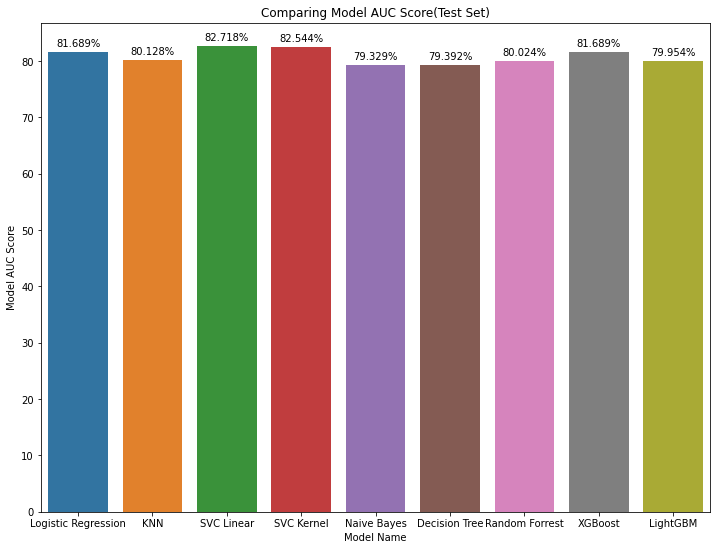

In [207]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models, y=model_auc)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')
  
plt.ylabel('Model AUC Score')
plt.xlabel('Model Name')
plt.title('Comparing Model AUC Score(Test Set)')

We proceed with Cross Validation for 4 of our best models:


*   SVC Kernel
*   Random Forrest
*   XGBoost
*   LightGBM


# Cross Validation

We will use accuracy as our metric for cross validation.

In [208]:
kernel_cv = cross_val_score(kernel_class,x_train, y_train, cv=10, scoring='accuracy')
rf_cv = cross_val_score(rf_class, x_train, y_train, cv=10, scoring='accuracy')
xgb_cv = cross_val_score(xgb_class, x_train, y_train, cv=10, scoring='accuracy')
lgb_cv = cross_val_score(lgb_class, x_train, y_train, cv=10, scoring='accuracy')

In [209]:
print("Cross Validation Score for SVC Kernel Model is: {:1.3f} +- {:1.3f}".format(kernel_cv.mean()*100, kernel_cv.std()*100))
print("Cross Validation Score for Random Forrest Model is: {:1.3f} +- {:1.3f}".format(rf_cv.mean()*100, rf_cv.std()*100))
print("Cross Validation Score for XGBoost Model is: {:1.3f} +- {:1.3f}".format(xgb_cv.mean()*100, xgb_cv.std()*100))
print("Cross Validation Score for LightGBM Model is: {:1.3f} +- {:1.3f}".format(lgb_cv.mean()*100, lgb_cv.std()*100))

Cross Validation Score for SVC Kernel Model is: 82.316 +- 3.188
Cross Validation Score for Random Forrest Model is: 81.326 +- 4.813
Cross Validation Score for XGBoost Model is: 81.612 +- 3.892
Cross Validation Score for LightGBM Model is: 82.034 +- 4.854


Let us consider just **SVM Kernel, XGBoost and LightGBM** for hyperparametr tuning as LightGBM has the lowest mean accuracy and one of the highest Standard deviation from our cross validation.

# HyperParameter Tuning using GridSearchCV

## SVM Kernel

In [210]:
svm_params = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' : [1, 0.1, 0.01, 0.001]
}

In [211]:
svc_grid = GridSearchCV(kernel_class, 
                        param_grid = svm_params,
                        cv=3,
                        n_jobs=-1,
                        verbose=1)

In [ ]:
svc_grid.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 14.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [ ]:
svc_grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
svc_class_opt = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc_class_opt.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy Score 81.00558659217877 %
ROC_AUC Score 80.92464768478574 %


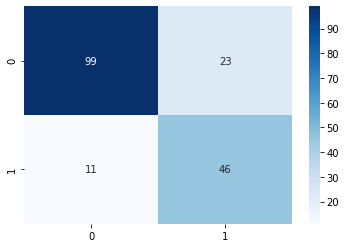

In [213]:
y_svc_pred = svc_class_opt.predict(x_test)
svc_acc, svc_auc = score(y_test, y_svc_pred)

## LightGBM

In [214]:
 lgb_params = {'learning_rate': [0.001, 0.01, 0.1], 
               'num_leaves': [6, 8, 12, 16], 
               'boosting_type': ['gbdt','dart','goss'], 
               'colsample_bytree': [0.65, 0.75, 0.8], 
               'subsample': [0.7, 0.75],
               'reg_alpha': [1, 2, 6],
               'reg_lambda': [1, 2, 6]
               }

In [72]:
lgb_grid = GridSearchCV(lgb_class,
                       param_grid = lgb_params,
                       cv=3,
                       n_jobs=-1,
                       verbose=1)

In [ ]:
lgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 1944 candidates, totalling 5832 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1444 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 3444 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 5832 out of 5832 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=42, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'cols

In [ ]:
lgb_grid.best_params_

In [ ]:
lgb_grid.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.75,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
               random_state=42, reg_alpha=1, reg_lambda=6, silent=True,
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [215]:
lgb_class_opt = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.75,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=12, objective=None,
               random_state=42, reg_alpha=1, reg_lambda=6, silent=True,
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [216]:
lgb_class_opt.fit(x_train,y_train)
y_lgb_pred = lgb_class_opt.predict(x_test)

Accuracy Score 83.24022346368714 %
ROC_AUC Score 83.49870578084555 %


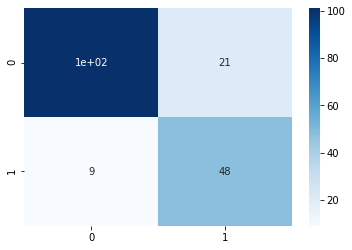

In [217]:
lgb_acc, lgb_auc = score(y_test, y_lgb_pred)

## XGBoost

In [218]:
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [219]:
xgb_grid = GridSearchCV(xgb_class,
                        param_grid = xgb_params,
                        cv=3,
                        n_jobs=-1,
                        verbose=1)

In [ ]:
xgb_grid.fit(x_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:   39.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_w

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [220]:
xgb_class_opt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [221]:
xgb_class_opt.fit(x_train, y_train)
y_xgb_pred = xgb_class_opt.predict(x_test)

Accuracy Score 84.91620111731844 %
ROC_AUC Score 85.25220860644058 %


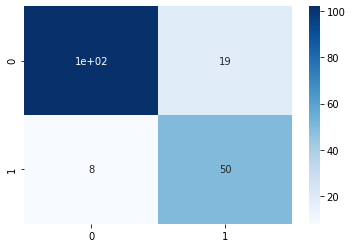

In [222]:
xgb_acc, xgb_auc = score(y_test, y_xgb_pred)

# Comparing Optimized Model Performance

In [223]:
model_accuracy_opt = [kernel_acc, lgb_acc, xgb_acc]
model_auc_opt = [kernel_auc, lgb_auc, xgb_auc]
models_opt=["SVC Kernel", "LightGBM", "XGBoost"]

Text(0.5, 1.0, 'Comparing Optimized Model Accuracy(Test Set)')

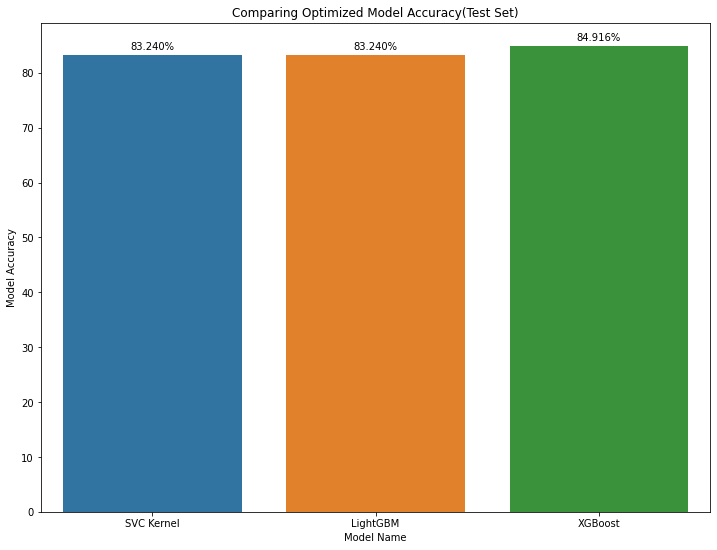

In [224]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models_opt, y=model_accuracy_opt)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')
  
plt.ylabel('Model Accuracy')
plt.xlabel('Model Name')
plt.title('Comparing Optimized Model Accuracy(Test Set)')

Text(0.5, 1.0, 'Comparing Optimized Model AUC Score(Test Set)')

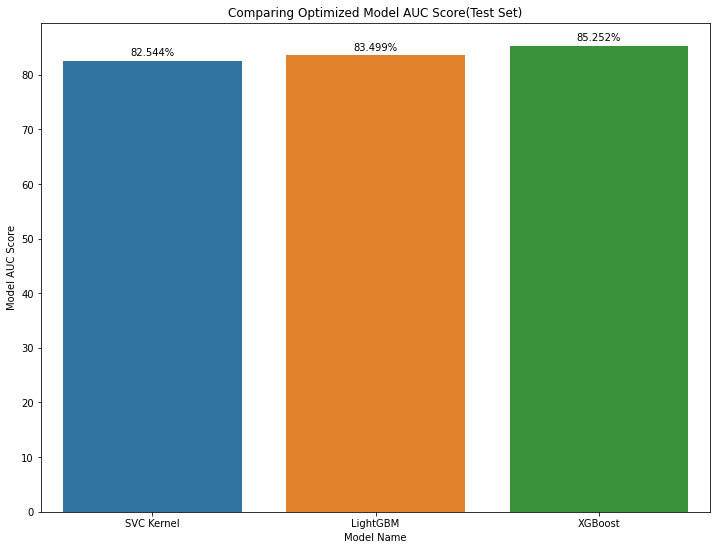

In [225]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=models_opt, y=model_auc_opt)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2.,
          height + 1,
          '{:1.3f}%'.format(height),
          ha='center')
  
plt.ylabel('Model AUC Score')
plt.xlabel('Model Name')
plt.title('Comparing Optimized Model AUC Score(Test Set)')

XGBoost seems like the best performing Model. We will confirm this by performing cross validation for the optimized models.

# Cross Validation of the Optimized Models

In [226]:
kernel_cv_opt = cross_val_score(svc_class_opt,x_train, y_train, cv=10, scoring='accuracy')
lgb_cv_opt = cross_val_score(lgb_class_opt, x_train, y_train, cv=10, scoring='accuracy')
xgb_cv_opt = cross_val_score(xgb_class_opt, x_train, y_train, cv=10, scoring='accuracy')

In [227]:
print("Cross Validation Score for Optimized SVC Kernel Model is: {:1.3f} +- {:1.3f}".format(kernel_cv_opt.mean()*100, kernel_cv_opt.std()*100))
print("Cross Validation Score for Optimized LightGBM Model is: {:1.3f} +- {:1.3f}".format(lgb_cv_opt.mean()*100, lgb_cv_opt.std()*100))
print("Cross Validation Score for Optimized XGBoost Model is: {:1.3f} +- {:1.3f}".format(xgb_cv_opt.mean()*100, xgb_cv_opt.std()*100))

Cross Validation Score for Optimized SVC Kernel Model is: 79.503 +- 4.866
Cross Validation Score for Optimized LightGBM Model is: 80.495 +- 4.675
Cross Validation Score for Optimized XGBoost Model is: 80.912 +- 4.208


This is surprising. Cross Validation shows us that XGBoost was the best performing model with a **mean accuracy of 81% and standard deviation of 4.2%.**

# Test Submission Dataset

We will perform the same steps of data cleaning and preprocessing to get the Test data in the same format as our training data.

In [242]:
test.isnull().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [243]:
pid = test['PassengerId']

In [244]:
test.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1, inplace=True)

We will handle Age and Fare missing values by filling them with the mean.

In [245]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [246]:
test['Age'] = test['Age'].astype(int)
test['Fare'] = test['Fare'].astype(int)

Handling Categorical Features.

In [247]:
test['Sex'] = test['Sex'].map(sex_map)

In [248]:
test['Embarked'] = test['Embarked'].map(embarked_map)

In [249]:
test['Age'] = test['Age'].astype(int)
test.loc[test['Age'] <= 11, 'Age'] = 0
test.loc[(test['Age'] > 11) & (test['Age'] <= 18), 'Age'] = 1
test.loc[(test['Age'] > 18) & (test['Age'] <= 22), 'Age'] = 2
test.loc[(test['Age'] > 22) & (test['Age'] <= 27), 'Age'] = 3
test.loc[(test['Age'] > 27) & (test['Age'] <= 33), 'Age'] = 4
test.loc[(test['Age'] > 33) & (test['Age'] <= 40), 'Age'] = 5
test.loc[(test['Age'] > 40) & (test['Age'] <= 66), 'Age'] = 6
test.loc[test['Age'] > 66, 'Age'] = 6

Extracting Title from Name

In [250]:
test['Title'] = test['Name'].apply(lambda x : extract_title(x))

In [251]:
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Cap', 'Col', 'Don', 'Dr'\
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [252]:
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [253]:
test['Title'] = test['Title'].map(titles)

In [254]:
test['Title'] = test['Title'].fillna(0)
test['Title'] = test['Title'].astype(int)

In [255]:
test['Relatives'] = test['SibSp'] + test['Parch']

In [256]:
test.loc[test['Relatives'] > 0, 'not_alone'] = 0
test.loc[test['Relatives'] == 0, 'not_alone'] = 1
test['not_alone'] = test['not_alone'].astype(int)

In [257]:
test.drop(['Name'], axis=1, inplace=True)

In [258]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relatives,not_alone
0,3,1,5,0,0,7,2,1,0,1
1,3,0,6,1,0,7,0,3,1,0
2,2,1,6,0,0,9,2,1,0,1
3,3,1,3,0,0,8,0,1,0,1
4,3,0,2,1,1,12,0,3,2,0


In [259]:
test = test.values

Feature Scaling Age and Fare

In [260]:
test = np.array(ct.transform(test))

#### Our Test Data is ready for prediction.

In [261]:
svc_test = svc_class_opt.predict(test)
svc_test = pd.Series(svc_test)

In [262]:
xgb_test = xgb_class_opt.predict(test)
xgb_test = pd.Series(xgb_test)

In [263]:
lgb_test = lgb_class_opt.predict(test)
lgb_test = pd.Series(lgb_test)

Putting the results into a DataFrame along with the PassengerId as per the Submission format.

In [264]:
first_submission = pd.concat({'PassengerId' : pid, 'Survived': svc_test}, axis=1)
second_submission = pd.concat({'PassengerId' : pid, 'Survived': xgb_test}, axis=1)
third_submission = pd.concat({'PassengerId' : pid, 'Survived': lgb_test}, axis=1)

Saving our Submissions as CSV files.

In [265]:
first_submission.to_csv('Arnav_First_Submission.csv', index=False)

In [266]:
second_submission.to_csv('Arnav_Second_Submission.csv', index=False)

In [267]:
third_submission.to_csv('Arnav_Third_Submission.csv', index=False)

# Deep Learning Approach

In [274]:
model1 = Sequential([
                     Dense(units=64, activation='relu'),
                     Dropout(0.25),
                     Dense(units=16, activation='relu'),
                     Dropout(0.25),
                     Dense(units=4, activation='relu'),
                     Dense(units=1, activation='sigmoid')
])

In [275]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [276]:
r1 = model1.fit(np.array(x_train).astype('float32'), y_train,
                validation_data=(np.array(x_test).astype('float32'), y_test),
                batch_size=128,
                epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 33ms/step - loss: 0.6672 - accuracy: 0.6208 - val_loss: 0.6482 - val_accuracy: 0.6089
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6337 - accuracy: 0.6166 - val_loss: 0.6272 - val_accuracy: 0.6089
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6472 - accuracy: 0.6152 - val_loss: 0.6134 - val_accuracy: 0.6145
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.6222 - val_loss: 0.6024 - val_accuracy: 0.6201
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6129 - accuracy: 0.6390 - val_loss: 0.5945 - val_accuracy: 0.6704
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5997 - accuracy: 0.6475 - val_loss: 0.5874 - val_accuracy: 0.6816
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6054 - accuracy: 0.6517 - val_loss: 0.5808 - val_accuracy: 0.7095
Epoch 8/100
6/6 [========

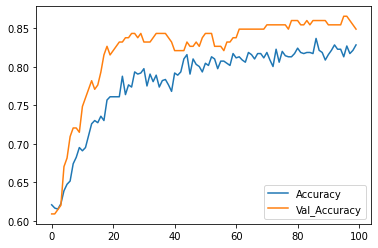

In [277]:
plt.plot(r1.history['accuracy'], label='Accuracy')
plt.plot(r1.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

In [278]:
ann_test = model1.predict_classes(test)

In [280]:
ann_test = ann_test.ravel()

In [281]:
ann_test = pd.Series(ann_test)

In [283]:
fourth_submission = pd.concat({'PassengerId' : pid, 'Survived': ann_test}, axis=1)

In [284]:
fourth_submission.to_csv('Arnav_Fourth_Submission.csv', index=False)